In [1]:
import sys
sys.path.append('../vysxd')
from vysxd_analysis import *
from vysxd_define import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

/home/david/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


First, let's animate a plot of phase space with time.

/tmp/ipykernel_934796/4209653748.py:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(-p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)


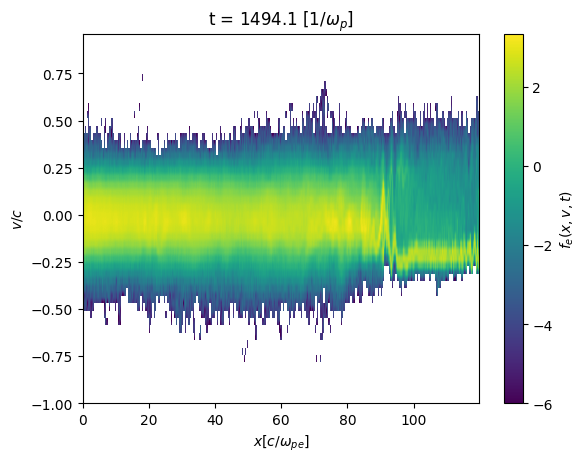

In [2]:
p1x1_files = np.sort(os.listdir('data/MS/PHA/p1x1/electrons/')) # Create a sorted list of filenames you will be analyzing

if not (os.path.isdir('figures')): # Create a directory for the animation, if there isn't one already
    os.makedirs('figures')
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='phase-space-animation', artist='Matplotlib',
                comment='visualizing the phase space evolution of the distribution function') # Describe what the animation is
writer = FFMpegWriter(fps=24, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure()



plt.tight_layout()
# Update the frames for the movie
with writer.saving(fig, f"figures/electron_phase_space.mp4", dpi=400):
    for file in p1x1_files:
        p1x1 = vysxd_get_data(f'data/MS/PHA/p1x1/electrons/{file}') # Pull the phase space data
        plt.clf() # This clears the figure so you don't make a million colorbars lol
        plt.title(f't = {round(p1x1.TIME[0],1)} $[1/\omega_p]$')
        plt.imshow(np.log(-p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)
        plt.colorbar(label=r'$f_e(x,v,t)$')
        plt.xlabel(r'$x [c/\omega_{pe}]$') # Might need to rework this if the axes aren't static
        plt.ylabel(r'$v/c$')
        # plt.ylim(-0.3,0.3)
        writer.grab_frame()

/tmp/ipykernel_10946/2965777371.py:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)


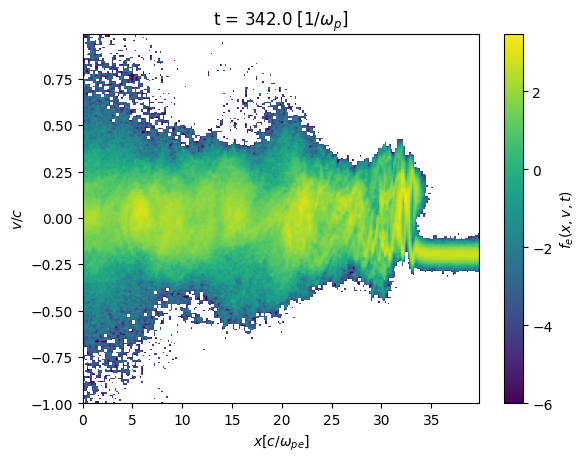

In [3]:
p1x1_files = np.sort(os.listdir('data/MS/PHA/p1x1/positrons/')) # Create a sorted list of filenames you will be analyzing

if not (os.path.isdir('figures')): # Create a directory for the animation, if there isn't one already
    os.makedirs('figures')
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='phase-space-animation', artist='Matplotlib',
                comment='visualizing the phase space evolution of the distribution function') # Describe what the animation is
writer = FFMpegWriter(fps=24, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure()



plt.tight_layout()
# Update the frames for the movie
with writer.saving(fig, f"positron_phase_space.mp4", dpi=400):
    for file in p1x1_files:
        p1x1 = vysxd_get_data(f'data/MS/PHA/p1x1/positrons/{file}') # Pull the phase space data
        plt.clf() # This clears the figure so you don't make a million colorbars lol
        plt.title(f't = {round(p1x1.TIME[0],1)} $[1/\omega_p]$')
        plt.imshow(np.log(p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)
        plt.colorbar(label=r'$f_e(x,v,t)$')
        plt.xlabel(r'$x [c/\omega_{pe}]$') # Might need to rework this if the axes aren't static
        plt.ylabel(r'$v/c$')
        # plt.ylim(-0.3,0.3)
        writer.grab_frame()